### Imports

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [202]:
# Data reading

In [13]:
path = 'simple_classification.csv'
df = pd.read_csv(path,index_col=0)

In [21]:
df.shape

(1258, 4)

In [80]:
df.describe()

,features_1,features_2,features_3
count,1258.000000,1258.000000,1258.000000
mean,0.002432,-0.000199,50.675676
std,1.602289,1.600537,28.462619
min,-2.500000,-2.500000,0.000000
25%,-1.560000,-1.560000,26.000000
50%,0.000000,0.000000,50.000000
75%,1.567500,1.560000,75.750000
max,2.500000,2.500000,99.000000


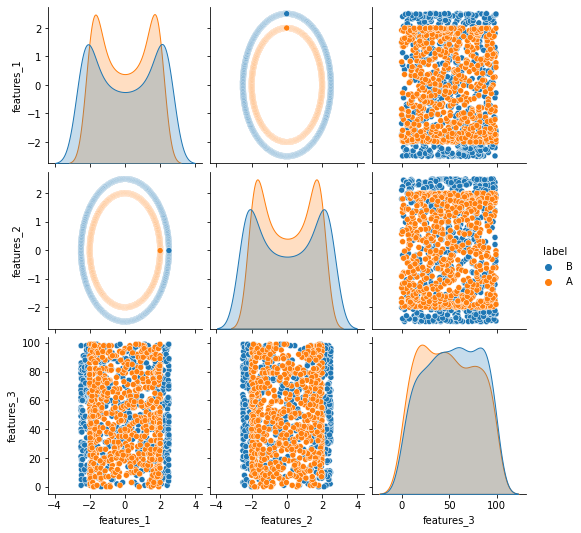

In [19]:
sns.pairplot(df, hue='label')

<AxesSubplot:>

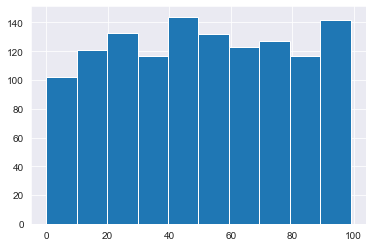

In [90]:
df['features_3'].hist()

Features 3 looks suspicious, probably its synthetic.

Lets plot only features_1 and features_2

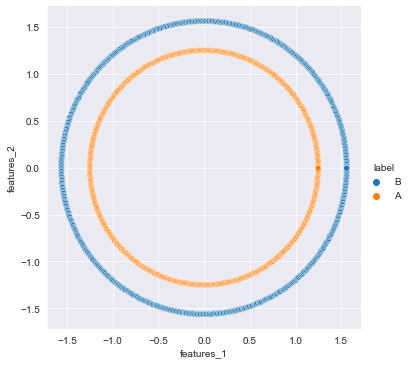

In [203]:
sns.relplot(data=df,x='features_1', y = 'features_2', hue ='label')

In [99]:
df['label'] =df['label'].map({'A':0,'B':1})

We have to use power 2 

In [95]:
df['rd2'] = pow(df['features_1'],2) + pow(df['features_2'],2)

In [98]:

lr=LogisticRegression()


In [117]:
from lightgbm import LGBMClassifier

C:\Users\Admin\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\Admin\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\Admin\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


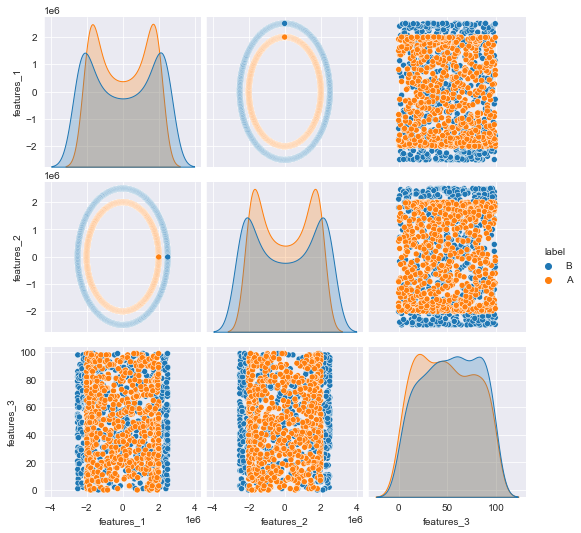

In [195]:
sns.pairplot(df, hue='label')

In [116]:


# train, test = train_test_split(df[['features_1','features_2','rd2','label']], test_size=0.2,random_state=12345)

train, test = train_test_split(df[['rd2','label']], test_size=0.2,random_state=12345)

features_train = train.drop(columns='label')
target_train = train['label']
features_test = test.drop(columns='label')
target_test = test['label']
lr=LogisticRegression()

lr.fit(features_train,target_train)

#Accuracy score
sum(lr.predict(features_test)==target_test)/len(target_test)

1.0

In [133]:

train, test = train_test_split(df[['features_1','features_2','label']], test_size=0.2)

# train, test = train_test_split(df[['rd2','label']], test_size=0.2,random_state=12345)

features_train = train.drop(columns='label')
target_train = train['label']
features_test = test.drop(columns='label')
target_test = test['label']

model= LGBMClassifier()
model.fit(features_train,target_train)


sum(model.predict(features_test)==target_test)/len(target_test)

0.996031746031746

In [134]:
df['rd_1'] = pow(df['features_1'],2)
df['rd_2'] = pow(df['features_2'],2)

In [145]:

train, test = train_test_split(df[['features_1','features_2','features_3','rd_1','rd_2','rd2','label']], test_size=0.2)

# train, test = train_test_split(df[['rd2','label']], test_size=0.2,random_state=12345)


features_train = train.drop(columns='label')
target_train = train['label']
features_test = test.drop(columns='label')
target_test = test['label']
lr=LogisticRegression()

lr.fit(features_train,target_train)

#Accuracy score
print('accuracy: ',sum(lr.predict(features_test)==target_test)/len(target_test))
print(lr.coef_)

accuracy:  1.0
[[-2.96803673e-03  2.89071511e-03  3.30973665e-03  1.72270954e+00
   1.71007924e+00  3.43278879e+00]]


Lets multiply our features by 10**6

In [223]:
path = 'simple_classification.csv'
df = pd.read_csv(path,index_col=0)

In [224]:
df['features_1']=df['features_1']*1e06
df['features_2']=df['features_2']*1e06
df['rd2'] = pow(df['features_1'],2) + pow(df['features_2'],2)

In [207]:

train, test = train_test_split(df[['rd2','label']], test_size=0.2)

# train, test = train_test_split(df[['rd2','label']], test_size=0.2,random_state=12345)


features_train = train.drop(columns='label')
target_train = train['label']
features_test = test.drop(columns='label')
target_test = test['label']
lr=LogisticRegression()

lr.fit(features_train,target_train)

#Accuracy score
print('accuracy: ',sum(lr.predict(features_test)==target_test)/len(target_test))
print(lr.coef_)

accuracy:  0.5317460317460317
[[0.]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy falls. We have to scale our data

In [208]:
df = pd.read_csv(path,index_col=0)

In [209]:
scaler = StandardScaler()

In [210]:
scaled_data=scaler.fit_transform(df[['features_1','features_2']])

In [211]:
df['features_1']=scaled_data[:,0]
df['features_2']=scaled_data[:,1]

In [213]:
df['rd2'] = pow(df['features_1'],2) + pow(df['features_2'],2)

In [214]:

train, test = train_test_split(df[['rd2','label']], test_size=0.2)

# train, test = train_test_split(df[['rd2','label']], test_size=0.2,random_state=12345)


features_train = train.drop(columns='label')
target_train = train['label']
features_test = test.drop(columns='label')
target_test = test['label']
lr=LogisticRegression()

lr.fit(features_train,target_train)

#Accuracy score
print('accuracy: ',sum(lr.predict(features_test)==target_test)/len(target_test))
print(lr.coef_)

accuracy:  1.0
[[8.8592795]]


Now everything is fine

From Youtube video https://github.com/kimfetti/Videos/blob/master/Seaborn/12_pairplot.ipynb

### Part 2

In [215]:
path = 'complex_classification.csv'
df = pd.read_csv(path,index_col=0)

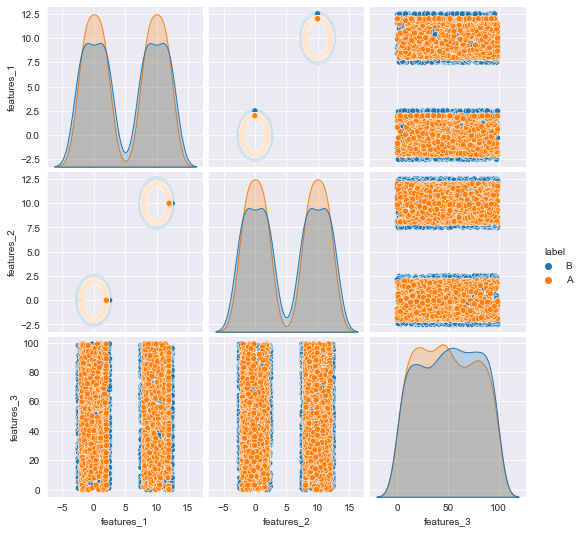

In [218]:
sns.pairplot(df, hue='label')

<AxesSubplot:xlabel='0'>

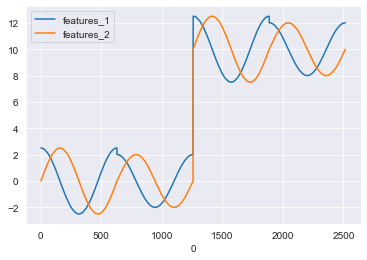

In [220]:
df[['features_1','features_2']].plot()

In [221]:
df['rd2'] = pow(df['features_1'],2) + pow(df['features_2'],2)

In [222]:

train, test = train_test_split(df[['rd2','label']], test_size=0.2)

# train, test = train_test_split(df[['rd2','label']], test_size=0.2,random_state=12345)


features_train = train.drop(columns='label')
target_train = train['label']
features_test = test.drop(columns='label')
target_test = test['label']
lr=LogisticRegression()

lr.fit(features_train,target_train)

#Accuracy score
print('accuracy: ',sum(lr.predict(features_test)==target_test)/len(target_test))
print(lr.coef_)

accuracy:  0.48214285714285715
[[5.58550999e-05]]
